### Assignment 3


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from astsadata import *
import warnings
warnings.filterwarnings('ignore')

## Bonus Question:
Consider the time series model presented in Bonus Assignment Question on Module 2 lecture slides, Slide 20.


### Proof of Stationarity When $X_0 \neq 0$

The random walk model is defined as:

$$
X_t = X_{t-1} + W_t \quad \text{for } t = 1, 2, \dots
$$

where $W_t \sim N(0, \sigma_W^2)$ (Gaussian white noise), and:

$$
X_0 = c, \quad \text{where } c \neq 0.
$$

---

## 1. Mean ($\mathbb{E}[X_t]$)

At $t = 0$:

$$
\mathbb{E}[X_0] = c
$$

At $t = 1$:

$$
X_1 = X_0 + W_1 \implies \mathbb{E}[X_1] = \mathbb{E}[X_0] + \mathbb{E}[W_1] = c + 0 = c
$$

At $t = 2$:

$$
X_2 = X_1 + W_2 \implies \mathbb{E}[X_2] = \mathbb{E}[X_1] + \mathbb{E}[W_2] = c + 0 = c
$$

For general $t$:

$$
\mathbb{E}[X_t] = c
$$

**Conclusion**: The mean is constant at $c$, which satisfies one condition for stationarity.

---

## 2. Variance ($\text{Var}(X_t)$)

At $t = 0$:

$$
\text{Var}(X_0) = 0 \quad \text{(since $X_0 = c$ is constant)}.
$$

At $t = 1$:

$$
X_1 = X_0 + W_1 \implies \text{Var}(X_1) = \text{Var}(W_1) = \sigma_W^2
$$

At $t = 2$:

$$
X_2 = X_1 + W_2 \implies \text{Var}(X_2) = \text{Var}(W_1) + \text{Var}(W_2) = 2\sigma_W^2
$$

For general $t$:

$$
\text{Var}(X_t) = t \cdot \sigma_W^2
$$

**Conclusion**: The variance increases linearly with $t$, which violates the stationarity condition.

---


The random walk model is **not stationary**, even when $X_0 \neq 0$.

1. The mean is constant ($\mathbb{E}[X_t] = c$).
2. The variance grows with time ($\text{Var}(X_t) = t \cdot \sigma_W^2$).
3. The autocovariance depends on $t$.

Thus, the process does not satisfy the requirements for stationarity. The value of $X_0$ shifts the starting point of the process but does not affect its non-stationary nature.


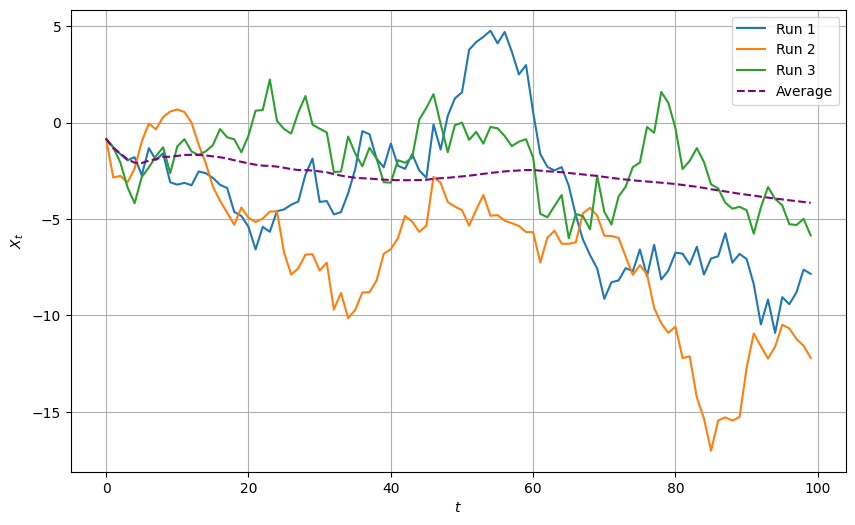

In [17]:
# Define parameters
n = 100  # number of steps
mean = 0  # mean of the white noise series
std_dev = 1  # standard deviation of the white noise series
num_runs = 3 # number of random walk runs
W_0 = np.random.normal()  # Initial random white noise


runs = []
for _ in range(num_runs):
    X = np.zeros(n)
    
    X[0] = W_0
    for t in range(1, n):
        X[t] = X[t - 1] + np.random.normal(mean, std_dev)
    runs.append(X)


# Calculate cumulative average inside each run
cumulative_avgs = []
for run in runs:
    cumulative_avg = np.cumsum(run) / (np.arange(n) + 1)
    cumulative_avgs.append(cumulative_avg)

# Calculate overall cumulative average across all runs
overall_cumulative_avg = np.mean(cumulative_avgs, axis=0)

# Plot all runs and overall cumulative average on the same plot
plt.figure(figsize=(10, 6))
for i in range(num_runs):
    plt.plot(range(n), runs[i], label=f'Run {i+1}')
plt.plot(range(n), overall_cumulative_avg, linestyle='--', color='purple', label='Average')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend()
plt.grid(True)
plt.show()


## Question 1:

    Generate the time series model from t=0 to t=100 for four different runs. Plot all of them on the same plot along with the cumulative average of the generated data.

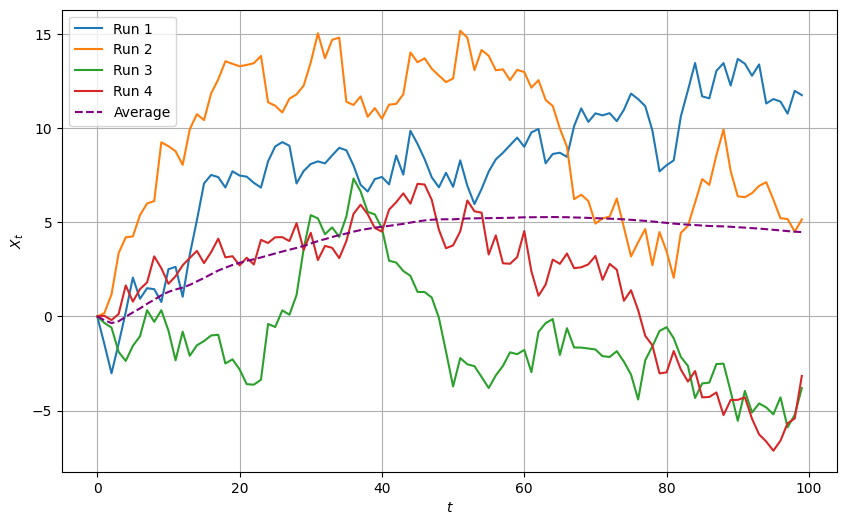

In [13]:
# Multiple runs

# Define parameters
n = 100  # number of steps
mean = 0  # mean of the white noise series
std_dev = 1  # standard deviation of the white noise series
num_runs = 4 # number of random walk runs

# Generate random walk runs
runs = []
for _ in range(num_runs):
    X = np.zeros(n)
    for t in range(1, n):
        X[t] = X[t - 1] + np.random.normal(mean, std_dev)
    runs.append(X)

# Calculate cumulative average inside each run
cumulative_avgs = []
for run in runs:
    cumulative_avg = np.cumsum(run) / (np.arange(n) + 1)
    cumulative_avgs.append(cumulative_avg)

# Calculate overall cumulative average across all runs
overall_cumulative_avg = np.mean(cumulative_avgs, axis=0)

# Plot all runs and overall cumulative average on the same plot
plt.figure(figsize=(10, 6))
for i in range(num_runs):
    plt.plot(range(n), runs[i], label=f'Run {i+1}')
plt.plot(range(n), overall_cumulative_avg, linestyle='--', color='purple', label='Average')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend()
plt.grid(True)
plt.show()


## Question 2:
    Run the KPSS test to check whether the time series generated from the first run in Part (i) is stationary.

In [6]:
from arch.unitroot import KPSS

# Perform KPSS test for the first run in the runs group. 
kpss_test = KPSS(runs[0])
p_value = kpss_test.pvalue

# Print the results
print(f'KPSS test p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


KPSS test p-value: 0.000

The time series is not stationary (reject "H0: The time series is stationary" at a 5% significance level).
